# Data frame info

 * **game**: Name of the game;
 * **table_link**: link to access the table;
 * **creation_time**: time that the table was created(not the time that the game started);
 * **is_elo_rating**: -1 if not option was not present(old tables), 0 if option was present but was set to false and 1 if was present and set to true;
 * **game_speed**: If present (this is in portuguese);
 * **game_status**: 'open': 0,'finished': 1,'abandonned': 2,'cancelled': 3

In [56]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [57]:
import os
from pandas import read_csv
csv_files_location = "../bgarena_gatherer/db_backup/"
game_tables_df = read_csv(os.path.join(csv_files_location, 'gametables.csv'))

In [58]:
game_tables_df = game_tables_df.set_index("id")

In [59]:
# remove non existing tables
non_error_game_table_df = game_tables_df[game_tables_df['game'] != "ERROR"]

## considering only tables with elo option present

In [60]:
game_tables_with_elo_rating_present = non_error_game_table_df[non_error_game_table_df['is_elo_rating'] > -1]

In [61]:
game_tables_with_elo_rating_present.head()

,game,table_link,creation_time,estimated_duration,is_elo_rating,game_speed,game_status
id,,,,,,,
277304,Stone Age,https://pt.boardgamearena.com/#!table?table=23...,17/08/2016,27 mn,1.0,Em tempo real : Velocidade normal,1.0
277305,Targi,https://pt.boardgamearena.com/#!table?table=23...,17/08/2016,32 mn,1.0,Em tempo real : Velocidade normal,1.0
277306,Seasons,https://pt.boardgamearena.com/#!table?table=23...,17/08/2016,19 mn,1.0,Em tempo real : Velocidade rápida,1.0
277307,Race for the Galaxy,https://pt.boardgamearena.com/#!table?table=23...,17/08/2016,7 mn,1.0,Em tempo real : Velocidade normal,1.0
277308,Koryŏ,https://pt.boardgamearena.com/#!table?table=23...,17/08/2016,5 mn,1.0,Em tempo real : Velocidade rápida,1.0


In [62]:
grouped_by_elo = game_tables_with_elo_rating_present.groupby('is_elo_rating')

## Elo Rating On (Green) vs Elo Rating Off (Blue)

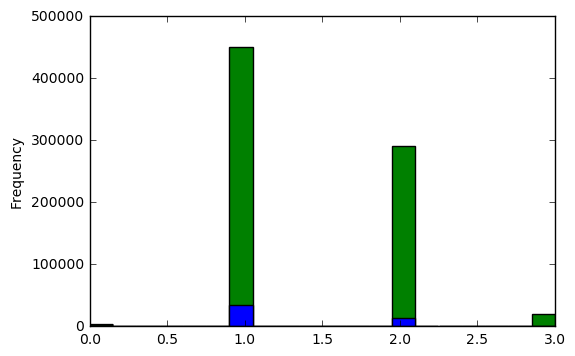

In [63]:
grouped_by_elo.get_group(1)['game_status'].plot.hist(bins=20, color='Green')
grouped_by_elo.get_group(0)['game_status'].plot.hist(bins=20, color='Blue')

In [64]:
elo_rated_finished = grouped_by_elo.get_group(1)[grouped_by_elo.get_group(1)['game_status']==1]
non_elo_rated_finished = grouped_by_elo.get_group(0)[grouped_by_elo.get_group(0)['game_status']==1]

## % of Finished games by Elo Rate Option (On/Off)

### Finished Games With Elo Rate On

In [65]:
perc = elo_rated_finished.size/float(grouped_by_elo.get_group(1).size) * 100
print "{} %".format(perc)

58.9439494543 %


### Finished Games With Elo Rate Off

In [66]:
perc = non_elo_rated_finished.size/float(grouped_by_elo.get_group(0).size) * 100
print "{} %".format(perc)

68.8002961751 %
